In [59]:
import sys
sys.path.insert(0, '/workspace/pyroomaccoustics/aaron_workspace')
import scriptlib
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra
from pyroomacoustics import dB
from pyroomacoustics.directivities import (
    DirectivityPattern,
    DirectionVector,
    CardioidFamily,
)
from pyroomacoustics.doa import spher2cart
from scipy.io import wavfile
import IPython
import random
import math



The calculation of the directivities is shown in the following part. Red represents the middle point of the listener, blue and green represent the sources. Light red, light green and light blue show the direction of the calculated directivites. The light green and light blue line show the wanted direction.

Possible issue: I'm not sure if directvity of listener is correct, but this shouldn't be a problematic issue.

94.29643130913351
[[1.4617689039575024, 8.004278688605083, 1.73], [1.8010376323546622, 9.925721226213636, 1.73]]
[[184.2964313091335, 90], [4.29643130913351, 90], [285.7918672530277, 90], [269.8145560835745, 90]]
[[1.7910503053083915, 6.839992121505372, 1.73], [1.7910503053083915, 6.839992121505372, 1.73], [1.4617689039575024, 8.004278688605083, 1.73], [1.8010376323546622, 9.925721226213636, 1.73]]


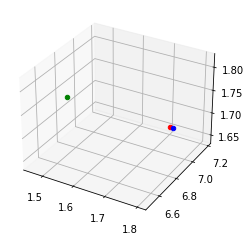

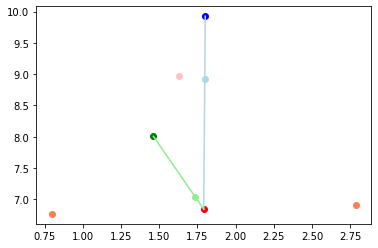

In [60]:
positions, dirs = scriptlib.random_position()

print(dirs)
print(positions)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(positions[0][0], positions[0][1], positions[0][2], c='red')
ax.scatter(positions[2][0], positions[0][1], positions[0][2], c='green')
ax.scatter(positions[3][0], positions[0][1], positions[0][2], c='blue')

fig2 = plt.figure()
ax2 = plt.axes()

ax2.scatter(positions[0][0], positions[0][1], c='red')
ax2.scatter(positions[2][0], positions[2][1], c='green')
ax2.scatter(positions[3][0], positions[3][1], c='blue')

h = [(positions[2][0] + positions[3][0])/2, (positions[2][1] + positions[3][1])/2]
ax2.scatter(h[0], h[1], c='pink')

x = [positions[2][0], positions[0][0]]
y = [positions[2][1], positions[0][1]]
ax2.plot(x,y, c='lightgreen')

x = [positions[3][0], positions[0][0]]
y = [positions[3][1], positions[0][1]]
ax2.plot(x,y, c='lightblue')

ax2.scatter(np.cos(math.radians(dirs[0][0]))+positions[0][0],np.sin(math.radians(dirs[0][0])) + positions[0][1], c='coral')
ax2.scatter(np.cos(math.radians(dirs[1][0]))+positions[1][0],np.sin(math.radians(dirs[1][0])) + positions[1][1], c='coral')
ax2.scatter(np.cos(math.radians(dirs[2][0]))+positions[2][0],np.sin(math.radians(dirs[2][0])) + positions[2][1], c='lightgreen')
ax2.scatter(np.cos(math.radians(dirs[3][0]))+positions[3][0],np.sin(math.radians(dirs[3][0])) + positions[3][1], c='lightblue')

Shows directvities inside the room.

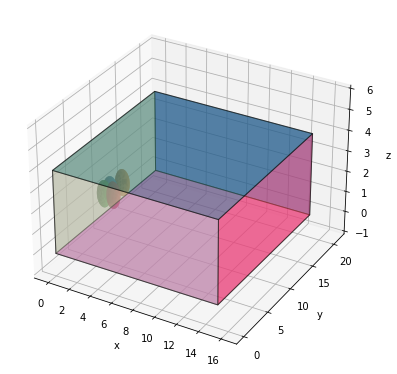

In [61]:
d = []

for di in dirs:
    d.append(scriptlib.make_dir_cardioid(di))


positions[0], positions[1] = scriptlib.get_pos_mics(positions[0], [dirs[0][0], dirs[1][0]])

room = pra.ShoeBox(
    p=[15, 20, 4],
    materials=pra.Material(0.4),
    fs=16000,
    max_order=40,
)
room.add_source(position=positions[2], directivity=d[2])
room.add_source(position=positions[3], directivity=d[3])

mic_array = pra.MicrophoneArray(np.c_[positions[0], positions[1]], directivity=d[:2],fs=1600)

room.add_microphone_array(mic_array)

fig, ax = room.plot()
ax.set_xlim([-1, 17])
ax.set_ylim([-1, 22])
ax.set_zlim([-1, 6])
ax.set_title("")
fig.set_size_inches(10, 5)

Shows 2D directivites.

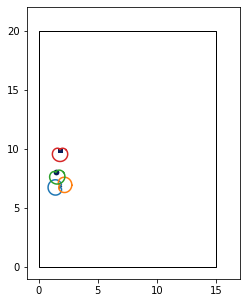

In [62]:
room_2d = pra.ShoeBox(p=[15, 20])

room_2d.add_source(position=positions[2][:2], directivity=d[2])
room_2d.add_source(position=positions[3][:2], directivity=d[3])

mic_array = pra.MicrophoneArray(np.c_[positions[0][:2], positions[1][:2]], directivity=d[:2],fs=1600)

room_2d.add_microphone_array(mic_array)

fig, ax = room_2d.plot()
ax.set_xlim([-1, 17])
ax.set_ylim([-1, 22])
ax.set_title("")
fig.set_size_inches(10, 5)